<a href="https://colab.research.google.com/github/basharbayatna/ANN_Keras/blob/main/HyperParameter_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

    #plot_history(history);

In [3]:
# Load data from your path
fpath = '/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week19/Data/nba.csv'
df = pd.read_csv(fpath, index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, Brandon Ingram to Jon Barry
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           1340 non-null   int64  
 1   MIN          1340 non-null   float64
 2   PTS          1340 non-null   float64
 3   FGM          1340 non-null   float64
 4   FGA          1340 non-null   float64
 5   FG%          1340 non-null   float64
 6   3P Made      1340 non-null   float64
 7   3PA          1340 non-null   float64
 8   3P%          1329 non-null   float64
 9   FTM          1340 non-null   float64
 10  FTA          1340 non-null   float64
 11  FT%          1340 non-null   float64
 12  OREB         1340 non-null   float64
 13  DREB         1340 non-null   float64
 14  REB          1340 non-null   float64
 15  AST          1340 non-null   float64
 16  STL          1340 non-null   float64
 17  BLK          1340 non-null   float64
 18  TOV          1340 non-null   float6

In [5]:
df.isna().sum().sum()

np.int64(11)

In [6]:
# Drop missings
df.dropna(inplace = True)

In [7]:
# Define X and y
target = 'TARGET_5Yrs'
X = df.drop(columns = target)
y = df[target]
# Train test_Val split
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size = .3, random_state=42)

In [8]:
# Split the X_test_val into test and val data
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size = .5, random_state=42)

In [9]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [10]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

19

In [ ]:
# Without dropout
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam',
              metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision'),
                        ])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 19)             │           380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
history = model.fit(X_train, y_train,
                    validation_data= (X_val, y_val),
                    epochs=50)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6018 - loss: 0.6564 - precision: 0.6713 - recall: 0.6719 - val_accuracy: 0.6683 - val_loss: 0.6181 - val_precision: 0.6866 - val_recall: 0.7931
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6765 - loss: 0.6042 - precision: 0.6976 - recall: 0.8256 - val_accuracy: 0.6683 - val_loss: 0.5882 - val_precision: 0.6866 - val_recall: 0.7931
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6437 - loss: 0.6054 - precision: 0.6762 - recall: 0.7951 - val_accuracy: 0.6935 - val_loss: 0.5753 - val_precision: 0.7132 - val_recall: 0.7931
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6983 - loss: 0.5700 - precision: 0.7402 - recall: 0.8245 - val_accuracy: 0.6935 - val_loss: 0.5696 - val_precision: 0.7132 - val_recall: 0.7931
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6830 - loss: 0.5792 - precision: 0.7250 - recall: 0.7761 - val_accuracy: 0.6935 - val_loss: 0.5655 - va

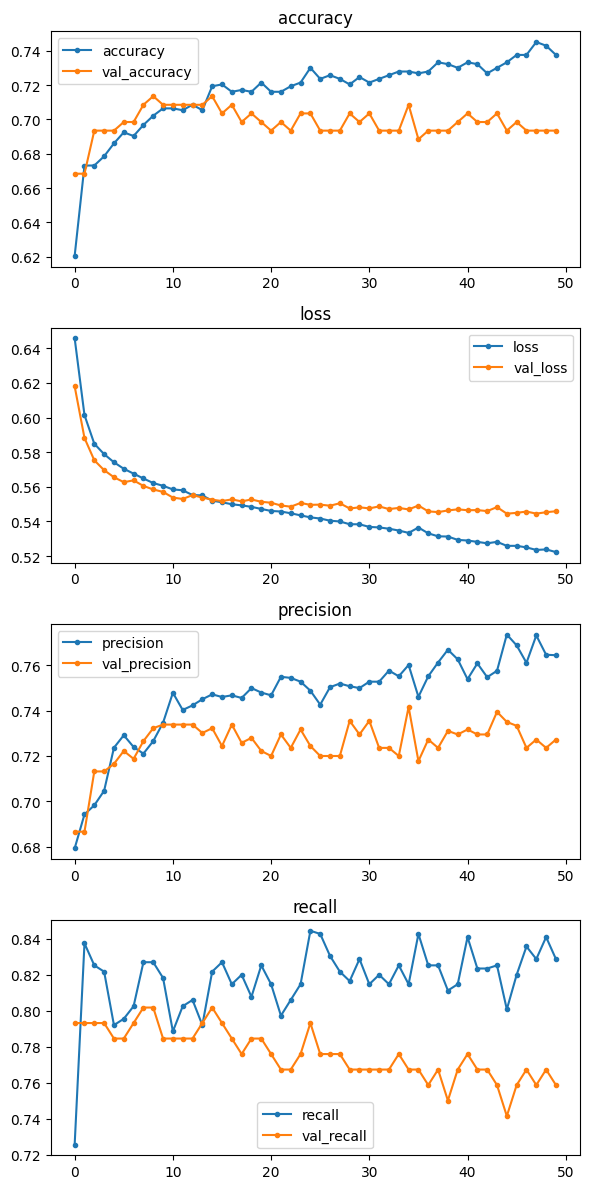

In [ ]:
# Visualize the results
plot_history(history, marker='.');

In [ ]:
# Evaluate neural network with built in evaluation
result = model.evaluate(X_test, y_test, return_dict=True)
result

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7556 - loss: 0.5306 - precision: 0.8141 - recall: 0.8310


{'accuracy': 0.7450000047683716,
 'loss': 0.5368438959121704,
 'precision': 0.8270676732063293,
 'recall': 0.7971014380455017}

# Dropout Layer

In [ ]:
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10,
                activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=50)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5482 - loss: 0.7412 - precision: 0.6042 - recall: 0.7971 - val_accuracy: 0.5930 - val_loss: 0.6534 - val_precision: 0.5926 - val_recall: 0.9655
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5920 - loss: 0.6600 - precision: 0.6244 - recall: 0.8251 - val_accuracy: 0.6231 - val_loss: 0.6137 - val_precision: 0.6158 - val_recall: 0.9397
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6296 - loss: 0.6443 - precision: 0.6675 - recall: 0.8041 - val_accuracy: 0.6633 - val_loss: 0.5950 - val_precision: 0.6667 - val_recall: 0.8448
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6417 - loss: 0.6284 - precision: 0.6795 - recall: 0.8101 - val_accuracy: 0.6583 - val_loss: 0.5864 - val_precision: 0.6644 - val_recall: 0.8362
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6425 - loss: 0.6127 - precision: 0.6712 - recall: 0.8356 - val_accuracy: 0.6683 - val_loss: 0.5845 - val_precision

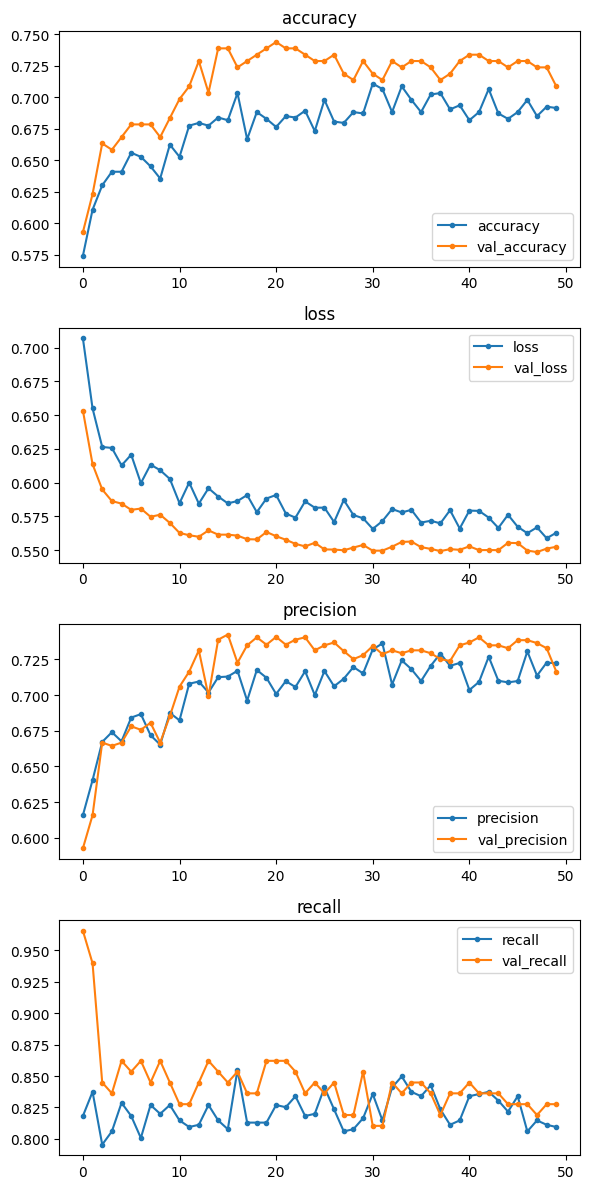

In [ ]:
# Visualize the results
plot_history(history, marker='.');

In [ ]:
# Evaluate neural network with built in evaluation
result = model.evaluate(X_test, y_test, return_dict=True)
result

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7421 - loss: 0.5374 - precision: 0.7945 - recall: 0.8377


{'accuracy': 0.7250000238418579,
 'loss': 0.5409307479858398,
 'precision': 0.8029196858406067,
 'recall': 0.7971014380455017}

# Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# With early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10,
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Instantiate EarlyStopping
early_stopping = EarlyStopping(patience = 5)

In [ ]:
# Fit the model with the early stopping callback
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5410 - loss: 0.7062 - precision: 0.5884 - recall: 0.8272 - val_accuracy: 0.5879 - val_loss: 0.6479 - val_precision: 0.5914 - val_recall: 0.9483
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6409 - loss: 0.6167 - precision: 0.6531 - recall: 0.9522 - val_accuracy: 0.6231 - val_loss: 0.6056 - val_precision: 0.6199 - val_recall: 0.9138
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6360 - loss: 0.6155 - precision: 0.6397 - recall: 0.8892 - val_accuracy: 0.6884 - val_loss: 0.5852 - val_precision: 0.6875 - val_recall: 0.8534
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7035 - loss: 0.5986 - precision: 0.7032 - recall: 0.8780 - val_accuracy: 0.6884 - val_loss: 0.5736 - val_precision: 0.6985 - val_recall: 0.8190
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7093 - loss: 0.5754 - precision: 0.7163 - recall: 0.8505 - val_accuracy: 0.6784 - val_loss: 0.5674

In [ ]:
# Evaluate neural network with built in evaluation
result = model.evaluate(X_test, y_test, return_dict=True)
result

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7194 - loss: 0.5450 - precision: 0.7835 - recall: 0.8108


{'accuracy': 0.7099999785423279,
 'loss': 0.5513123869895935,
 'precision': 0.7941176295280457,
 'recall': 0.782608687877655}

# Dropout Layer and Early Stopping

In [ ]:
# With dropout and early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10,
                activation = 'relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Instantiate early stopping
early_stopping = EarlyStopping(patience = 5)

In [ ]:
# Fit the model with the early stopping callback
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.6126 - loss: 0.7241 - precision: 0.6227 - recall: 0.9160 - val_accuracy: 0.7000 - val_loss: 0.5786 - val_precision: 0.7031 - val_recall: 0.9783
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6013 - loss: 0.6490 - precision: 0.6376 - recall: 0.8478 - val_accuracy: 0.7000 - val_loss: 0.5776 - val_precision: 0.7143 - val_recall: 0.9420
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6207 - loss: 0.6190 - precision: 0.6521 - recall: 0.8258 - val_accuracy: 0.7050 - val_loss: 0.5770 - val_precision: 0.7337 - val_recall: 0.8986
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6354 - loss: 0.6475 - precision: 0.6528 - recall: 0.7879 - val_accuracy: 0.7250 - val_loss: 0.5760 - val_precision: 0.7610 - val_recall: 0.8768
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6250 - loss: 0.6292 - precision: 0.6541 - recall: 0.7663 - val_accuracy: 0.7250 - val_loss: 0.

In [ ]:
# Evaluate neural network with built in evaluation
result = model.evaluate(X_test, y_test, return_dict=True)
result

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7322 - loss: 0.5477 - precision: 0.8103 - recall: 0.7914


{'accuracy': 0.7099999785423279,
 'loss': 0.5481035709381104,
 'precision': 0.817460298538208,
 'recall': 0.7463768124580383}

# Keras Tunning

In [11]:
# Build and Compile Model within a function
def build_model():
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])
    return model

In [12]:
# Call our build function to build model
basic_model = build_model()

# Get model summary
basic_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 19)             │           380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.8 MB/s eta 0:00:00


In [15]:
from keras_tuner import HyperParameters as hp
import keras_tuner as kt

In [16]:
# Build and Compile Model within a function to try optimizers
def build_model(hp):
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(10,
                activation = 'relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  loss='bce',
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision')])
    return model

In [17]:
# Make a folder to store results of hyperparameter tuning
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [18]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=5,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuning')

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [20]:
# Run the tuner
epochs = 100
tuner.search(X_train, y_train,  epochs=epochs,
             validation_data = (X_val, y_val), callbacks = [early_stop])

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.6683416962623596

Best val_accuracy So Far: 0.713567852973938
Total elapsed time: 00h 00m 14s


In [21]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'optimizer': 'rmsprop',
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [22]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 19)             │           380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Evaluate neural network with built in evaluation
result = best_model.evaluate(X_test, y_test, return_dict=True)
result

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7025 - loss: 0.6038 - precision: 0.7996 - recall: 0.7491


{'accuracy': 0.6700000166893005,
 'loss': 0.6162570714950562,
 'precision': 0.7903226017951965,
 'recall': 0.7101449370384216}

# Tunning Multiple Hyperparametrs

In [24]:
# Build and Compile Model within a function to try different optimizers, units, and dropout values
def build_model(hp):
    # Instantiate Model
    model = Sequential()
    # First hidden layer
    model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    # Try different values for units
    model.add(Dense(units=hp.Int('units', min_value=10, max_value=50, step=5), activation='relu'))
    # Try different values for dropout rate
    model.add(Dropout(hp.Float(name="dropout_value", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    # Try different optimizers
    model.compile(optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  loss='bce',
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision')])
    return model

In [25]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuning')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Run the tuner
epochs = 100
tuner.search(X_train, y_train,  epochs=epochs,
             validation_data = (X_val, y_val), callbacks = [early_stop])

Trial 172 Complete [00h 00m 07s]
val_accuracy: 0.6984924674034119

Best val_accuracy So Far: 0.7487437129020691
Total elapsed time: 00h 14m 25s


In [27]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'units': 45,
 'dropout_value': 0.2,
 'optimizer': 'adam',
 'tuner/epochs': 4,
 'tuner/initial_epoch': 2,
 'tuner/bracket': 4,
 'tuner/round': 1,
 'tuner/trial_id': '0059'}

In [28]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 19)             │           380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 45)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            46 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,326 (5.18 KB)

 Trainable params: 1,326 (5.18 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Evaluate neural network with tuned optimizer, units, and dropout
result = best_model.evaluate(X_test, y_test, return_dict=True)
result

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7442 - loss: 0.5690 - precision: 0.8222 - recall: 0.7955


{'accuracy': 0.699999988079071,
 'loss': 0.5764868855476379,
 'precision': 0.8095238208770752,
 'recall': 0.739130437374115}

In [30]:
# Inspect results in more detail
tuner.results_summary(5)

Results summary
Results in KerasTuner/Rookie_tuning
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 0113 summary
Hyperparameters:
units: 45
dropout_value: 0.2
optimizer: adam
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 4
tuner/round: 1
tuner/trial_id: 0059
Score: 0.7487437129020691

Trial 0135 summary
Hyperparameters:
units: 15
dropout_value: 0.2
optimizer: nadam
tuner/epochs: 12
tuner/initial_epoch: 4
tuner/bracket: 4
tuner/round: 2
tuner/trial_id: 0099
Score: 0.7487437129020691

Trial 0063 summary
Hyperparameters:
units: 50
dropout_value: 0.4
optimizer: nadam
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.7437185645103455

Trial 0098 summary
Hyperparameters:
units: 50
dropout_value: 0.4
optimizer: nadam
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 4
tuner/round: 1
tuner/trial_id: 0063
Score: 0.7437185645103455

Trial 0131 summary
Hyperparameters:
units: 45
dropout_value: 0.2
optimizer: adam
tuner/epochs: